In [10]:
# Import modules
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pysheds.grid import Grid
import numpy as np

In [21]:
# Read raw DEM
grid = Grid.from_raster('../datos/dem_elhigo_wgs84.tif') # datos\dem_elhigo.tif
dem = grid.read_raster('../datos/dem_elhigo_wgs84.tif')
# corregimos valores nulos del dem
#dem = np.where((dem == grid.nodata) | (dem < 0), np.nan, dem)

In [22]:
print("Valor mínimo:", np.nanmin(dem))
print("Valor máximo:", np.nanmax(dem))

Valor mínimo: 1
Valor máximo: 32767


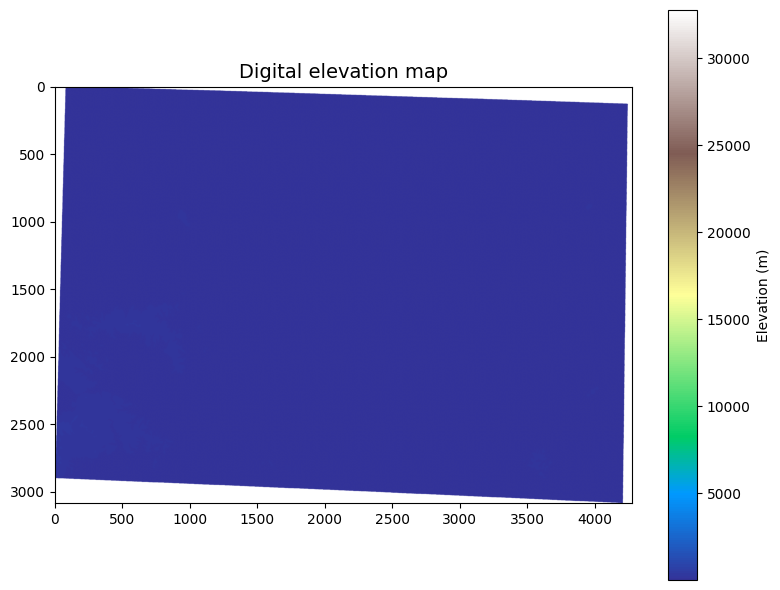

In [24]:
# Plot the raw DEM
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)
plt.imshow(dem, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title('Digital elevation map', size=14)
plt.tight_layout()

In [20]:
# Detect pits
pits = grid.detect_pits(dem)

AttributeError: 'numpy.ndarray' object has no attribute 'nodata'